<a href="https://colab.research.google.com/github/ShahKhalid1234/Meri-Skill/blob/main/DataExtractionAndCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install required libraries (if not already installed)
!pip install pandas matplotlib seaborn

In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


In [3]:
# Step 3: Upload dataset
uploaded = files.upload()  # Manually upload the CSV file


Saving Order_Data_meriskill.csv to Order_Data_meriskill.csv


In [6]:

# Get the uploaded file name
file_path = list(uploaded.keys())[0]

In [7]:
# Step 4: Load dataset
df = pd.read_csv(file_path)

<ipython-input-7-5e76ba0ab0fc>:2: DtypeWarning: Columns (3,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [8]:
# Step 5: Display missing values before cleaning
print("Missing Values Before Cleaning:\n")
print(df.isnull().sum())

Missing Values Before Cleaning:

OrderID                 0
Region                  0
Country                 0
CustID                  0
Customer_Name           3
ProductSKU              0
Product_Category        0
OrderLineItem           0
OrderQuantity           0
ProductCost             0
ProductPrice            0
OrderDate               0
AcquisitionSource       1
TransactionID           0
Fraud                 703
PaymentMethod           0
CardType             5223
Gender               6328
dtype: int64


In [9]:
# Step 6: Clean data
df["ProductPrice"] = pd.to_numeric(df["ProductPrice"], errors="coerce")
df["OrderDate"] = pd.to_datetime(df["OrderDate"], errors="coerce", format="%d-%m-%Y")
df["AcquisitionSource"] = df["AcquisitionSource"].str.strip()
df.drop_duplicates(inplace=True)


In [10]:
# Fill missing values
df.fillna({"Customer_Name": "Unknown", "AcquisitionSource": "Unknown",
           "Fraud": "False", "CardType": "Unknown", "Gender": "Unknown"}, inplace=True)


In [11]:
# Step 7: Save cleaned data
cleaned_file_path = "cleaned_order_data.csv"
df.to_csv(cleaned_file_path, index=False)
print("\nData cleaned and saved successfully!")


Data cleaned and saved successfully!


In [12]:
# Step 8: Display missing values after cleaning
print("\nMissing Values After Cleaning:\n")
print(df.isnull().sum())



Missing Values After Cleaning:

OrderID              0
Region               0
Country              0
CustID               0
Customer_Name        0
ProductSKU           0
Product_Category     0
OrderLineItem        0
OrderQuantity        0
ProductCost          0
ProductPrice         1
OrderDate            1
AcquisitionSource    0
TransactionID        0
Fraud                0
PaymentMethod        0
CardType             0
Gender               0
dtype: int64


In [13]:
# Step 9: Provide download link for cleaned dataset
files.download(cleaned_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
# Step 10: Perform basic exploratory analysis
print("\nDataset Info:\n")
print(df.info())
print("\nStatistical Summary:\n")
print(df.describe())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55910 entries, 0 to 55909
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   OrderID            55910 non-null  object        
 1   Region             55910 non-null  object        
 2   Country            55910 non-null  object        
 3   CustID             55910 non-null  object        
 4   Customer_Name      55910 non-null  object        
 5   ProductSKU         55910 non-null  object        
 6   Product_Category   55910 non-null  object        
 7   OrderLineItem      55910 non-null  int64         
 8   OrderQuantity      55910 non-null  float64       
 9   ProductCost        55910 non-null  float64       
 10  ProductPrice       55909 non-null  float64       
 11  OrderDate          55909 non-null  datetime64[ns]
 12  AcquisitionSource  55910 non-null  object        
 13  TransactionID      55910 non-null  object    

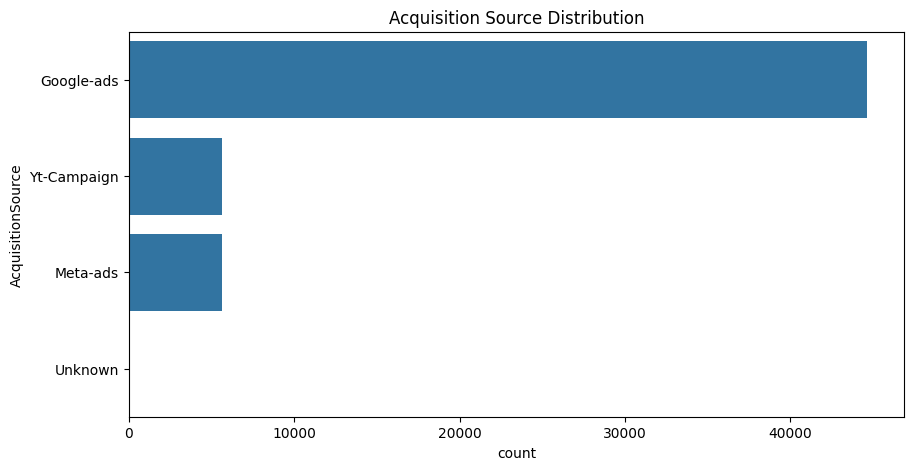

In [15]:
# Step 11: Plot Acquisition Source Distribution
plt.figure(figsize=(10, 5))
sns.countplot(y=df["AcquisitionSource"], order=df["AcquisitionSource"].value_counts().index)
plt.title("Acquisition Source Distribution")
plt.show()